# Investigation of USDA 

In [1]:
#Imports
import csv
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

## DATA PROCESSING

### Read in data base

In [2]:
data = pd.read_csv("nndb_flat.csv")
data.head()
print(data['Zinc_mg'])

0       0.09
1       0.05
2       0.01
3       2.66
4       2.60
5       2.38
6       2.38
7       2.94
8       3.43
9       2.79
10      3.07
11      0.40
12      0.33
13      0.47
14      0.51
15      0.38
16      0.51
17      3.75
18      2.88
19      3.50
20      1.14
21      3.90
22      3.90
23      2.10
24      3.00
25      2.92
26      2.46
27      2.76
28      3.61
29      2.81
        ... 
8588    3.30
8589    0.05
8590    0.05
8591    1.15
8592    5.03
8593    3.83
8594    0.08
8595    3.90
8596    4.10
8597    3.13
8598    0.13
8599    0.02
8600    0.09
8601    0.21
8602    2.77
8603    0.41
8604    0.05
8605    0.03
8606    0.10
8607    0.02
8608    1.49
8609    0.19
8610    0.10
8611    0.85
8612    1.00
8613    1.10
8614    1.55
8615    0.19
8616    1.00
8617    1.00
Name: Zinc_mg, Length: 8618, dtype: float64


### Extract the relavent data<br>
Remove redundant USRDA data coilumns, keep nutritional columns

In [3]:
data_no_classes = data.loc[:,'Energy_kcal':'Zinc_mg']
data_no_classes.shape
data_no_classes.head()

classes = data.loc[:, 'FoodGroup']

In [4]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(data_no_classes)
x_std.shape

(8618, 23)

In [5]:
data_no_classes_STD = pd.DataFrame(
    {'Energy_kcal': x_std[:, 0],'Protein_g': x_std[:, 1],'Fat_g': x_std[:, 2],
    'Carb_g': x_std[:, 3],'Sugar_g': x_std[:, 4],'Fiber_g': x_std[:, 5],
    'VitA_mcg': x_std[:, 6],'VitB6_mg': x_std[:, 7],'VitB12_mcg': x_std[:, 8],
    'VitC_mg': x_std[:, 9],'VitE_mg': x_std[:, 10],'Folate_mcg': x_std[:, 11],
    'Niacin_mg': x_std[:, 12],'Riboflavin_mg': x_std[:, 13],'Thiamin_mg': x_std[:, 14],
    'Calcium_mg': x_std[:, 15],'Copper_mcg': x_std[:, 16],'Iron_mg': x_std[:, 17],
    'Magnesium_mg': x_std[:, 18],'Manganese_mg': x_std[:, 19],'Phosphorus_mg': x_std[:, 20],
    'Selenium_mcg': x_std[:, 21],'Zinc_mg': x_std[:, 22]})



# PCA and LDA

## Labelleing by Food Group

In [6]:
targets = ['Dairy and Egg Products','Spices and Herbs','Baby Foods','Fats and Oils',
           'Poultry Products','Soups, Sauces, and Gravies','Sausages and Luncheon Meats',
           'Breakfast Cereals','Snacks','Fruits and Fruit Juices','Pork Products',
           'Vegetables and Vegetable Products','Nut and Seed Products','Beef Products',
           'Beverages','Finfish and Shellfish Products','Legumes and Legume Products',
           'Lamb, Veal, and Game Products','Baked Products','Sweets',
           'Cereal Grains and Pasta','Fast Foods','Meals, Entrees, and Side Dishes',
           'American Indian/Alaska Native Foods','Restaurant Foods']

Maroon='#800000'
Green='#008000'
Olive='#808000'
Navy='#000080'
Purple='#800080'
Teal='#008080'
Silver='#c0c0c0'
Grey='#808080'
Red='#ff0000'
Lime='#00ff00'
Yellow='#ffff00'
Blue='#0000ff'
Fuchsia='#ff00ff'
Aqua='#00ffff'
White='#ffffff'
Grey0='#000000'
NavyBlue='#00005f'
DarkBlue='#000087'
Blue3='#0000af'
Blue3='#0000d7'
Blue1='#0000ff'
DarkGreen='#005f00'
DeepSkyBlue4='#005f5f'
DeepSkyBlue4='#005f87'
DeepSkyBlue4='#005faf'
DodgerBlue3='#005fd7'

colors = [Maroon,Green,Olive,Navy,Purple,Teal,Silver,Grey,Red,Lime,Yellow,Blue,
Fuchsia,Aqua,White,Grey0,NavyBlue,DarkBlue,Blue3,Blue3,Blue1,DarkGreen,DeepSkyBlue4,
DeepSkyBlue4,DeepSkyBlue4,DodgerBlue3]




## Calculate PCA and investigate variance of components

### Run PCA on standardized data

In [7]:
fit = PCA()
pca = fit.fit_transform(x_std)

In [8]:

# # n = len(X.columns)-1 # set the number
# # pca = PCA(n_components = n)
# # X_pca = pca.fit(X).transform(X)
 
# df_pca = pd.DataFrame(pca)
# df_pca['y'] = pd.DataFrame(y)
# df_pca.columns = [['pc1', 'pc2', 'pc3', 'y']]
# df_pca.head()
 
 
 
# # ## Biplot - Leverage `seaborn` package
 
# # In[83]:
 
# import seaborn as sns
 
# # Scatter plot based and assigne color based on 'label - y'
# sns.lmplot('pc1', 'pc2', data=df_pca, fit_reg = False, hue = 'y', size = 15, scatter_kws={"s": 100})
 
# # set the maximum variance of the first two PCs
# # this will be the end point of the arrow of each **original features**
# xvector = pca.components_[0]
# yvector = pca.components_[1]
 
# # value of the first two PCs, set the x, y axis boundary
# xs = pca.transform(X)[:,0]
# ys = pca.transform(X)[:,1]
 
# ## visualize projections
 
# ## Note: scale values for arrows and text are a bit inelegant as of now,
# ##       so feel free to play around with them
# for i in range(len(xvector)):
#     # arrows project features (ie columns from csv) as vectors onto PC axes
#     # we can adjust length and the size of the arrow
#     plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
#               color='r', width=0.005, head_width=0.05)
#     plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
#              list(df.columns.values)[i], color='r')
 
# for i in range(len(xs)):
#     plt.text(xs[i]*1.08, ys[i]*1.08, list(X.index)[i], color='b') # index number of each observations
# plt.title('PCA Plot of first PCs')

### Find which components explain the most variance

In [9]:
print fit.explained_variance_ratio_
print fit.explained_variance_ratio_[:5].sum()

[2.36925468e-01 1.13846015e-01 8.83433734e-02 8.17013669e-02
 7.11161480e-02 4.95813332e-02 4.61246638e-02 4.02719041e-02
 3.74790508e-02 3.58559322e-02 3.17927198e-02 2.59519549e-02
 2.21153503e-02 2.04113766e-02 1.77385355e-02 1.46927827e-02
 1.43290735e-02 1.39668837e-02 1.11392349e-02 1.03538827e-02
 9.18082227e-03 6.91711649e-03 1.65010749e-04]
0.5919323716235941


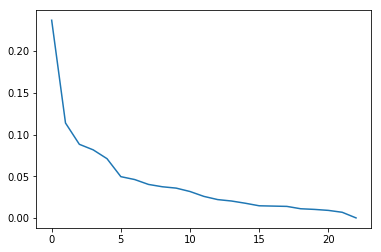

In [10]:
plt.plot(fit.explained_variance_ratio_)

PC1 : high in vitamins and minerals, low in fat and sugar 
May assume high protein, high iron levels, however not the case


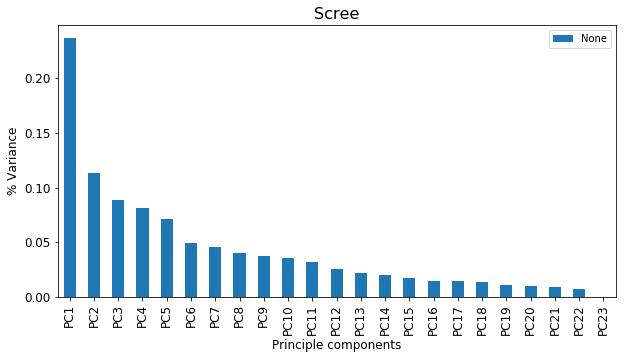

PC1     0.236925
PC2     0.113846
PC3     0.088343
PC4     0.081701
PC5     0.071116
PC6     0.049581
PC7     0.046125
PC8     0.040272
PC9     0.037479
PC10    0.035856
PC11    0.031793
PC12    0.025952
PC13    0.022115
PC14    0.020411
PC15    0.017739
PC16    0.014693
PC17    0.014329
PC18    0.013967
PC19    0.011139
PC20    0.010354
PC21    0.009181
PC22    0.006917
PC23    0.000165
dtype: float64
()
()
------------


In [11]:
one = pd.Series(fit.explained_variance_ratio_, index = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23'])
vec_1 = one.sort_values(ascending=False)

print("PC1 : high in vitamins and minerals, low in fat and sugar ")
print("May assume high protein, high iron levels, however not the case")
ax = vec_1.plot(kind='bar', title ="PC1", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Principle components", fontsize=12)
ax.set_ylabel("% Variance", fontsize=12)
ax.set_title("Scree", fontsize=16)
plt.show()
print(vec_1)
print()
print()
print('------------')

PC1 the 26% of the variance<br>
PC2 explains 11% of the variance<br>
Top 2 explain 37% of the variance<br>
Top 5 explain 60% of the variance<br>
Top 10 explain 81% of the variance <br>


### Investigate the top 5 components and identify what it reveals about the data

PC1 : high in vitamins and minerals, low in fat and sugar 
May assume high protein, high iron levels, however not the case


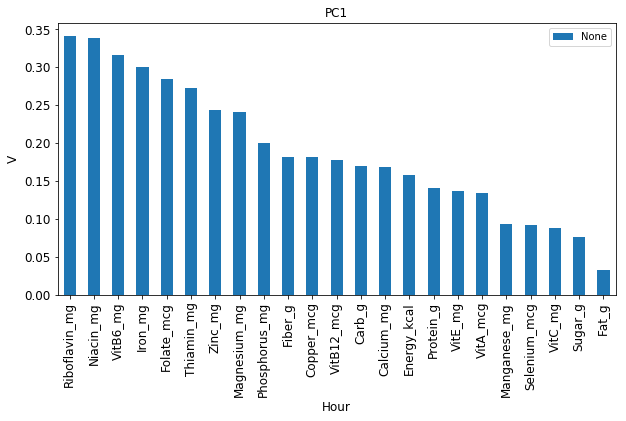

Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241348
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
Protein_g        0.140620
VitE_mg          0.137122
VitA_mcg         0.133519
Manganese_mg     0.093567
Selenium_mcg     0.092319
VitC_mg          0.087639
Sugar_g          0.076323
Fat_g            0.033008
dtype: float64
()
()
------------
High protein levels and Vitamin B12 are positively corolated
Foods high in protein are usually associate with food that is low in fat, Energy, Carbs, sugar and fibre


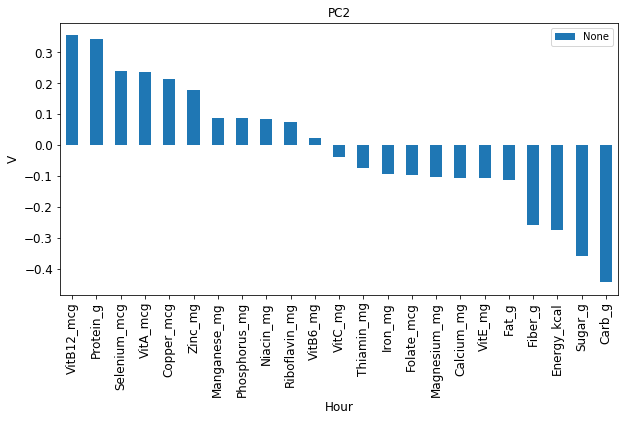

VitB12_mcg       0.355045
Protein_g        0.343397
Selenium_mcg     0.239322
VitA_mcg         0.236470
Copper_mcg       0.212669
Zinc_mg          0.177798
Manganese_mg     0.088783
Phosphorus_mg    0.087448
Niacin_mg        0.084801
Riboflavin_mg    0.073471
VitB6_mg         0.021129
VitC_mg         -0.038525
Thiamin_mg      -0.075150
Iron_mg         -0.093812
Folate_mcg      -0.097093
Magnesium_mg    -0.103361
Calcium_mg      -0.105173
VitE_mg         -0.106372
Fat_g           -0.111670
Fiber_g         -0.257733
Energy_kcal     -0.273449
Sugar_g         -0.358769
Carb_g          -0.443416
dtype: float64
()
()
------------
foods with high levels of folate riboflavin, thiamin are low in protein, phosphorous, energy and fat 


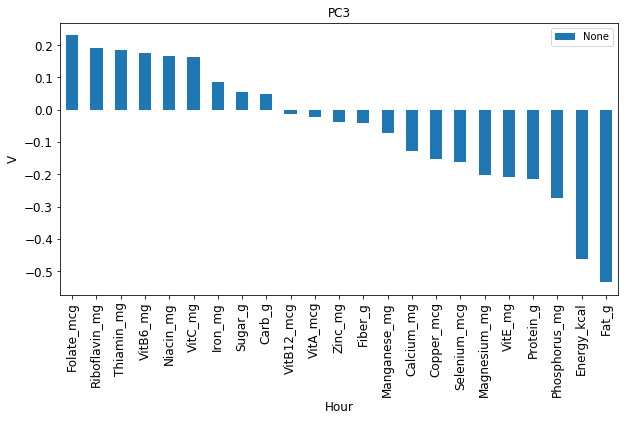

Folate_mcg       0.230985
Riboflavin_mg    0.192098
Thiamin_mg       0.184351
VitB6_mg         0.174648
Niacin_mg        0.164885
VitC_mg          0.162303
Iron_mg          0.087109
Sugar_g          0.055247
Carb_g           0.049822
VitB12_mcg      -0.012760
VitA_mcg        -0.021929
Zinc_mg         -0.038639
Fiber_g         -0.040397
Manganese_mg    -0.072630
Calcium_mg      -0.128139
Copper_mcg      -0.152263
Selenium_mcg    -0.163361
Magnesium_mg    -0.201225
VitE_mg         -0.207331
Protein_g       -0.213567
Phosphorus_mg   -0.274814
Energy_kcal     -0.462006
Fat_g           -0.534051
dtype: float64
()
()
------------


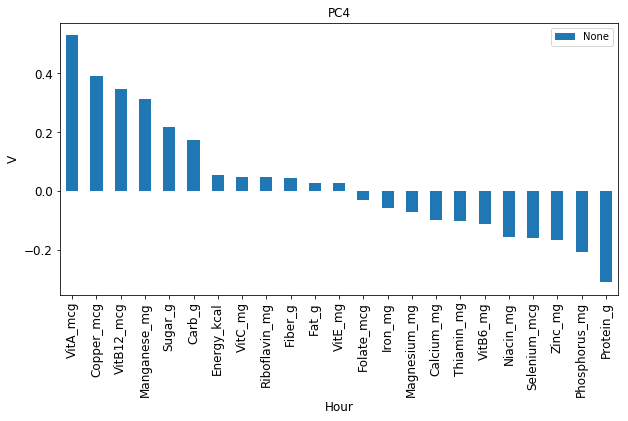

VitA_mcg         0.530395
Copper_mcg       0.389929
VitB12_mcg       0.346550
Manganese_mg     0.311369
Sugar_g          0.217373
Carb_g           0.174108
Energy_kcal      0.052280
VitC_mg          0.047584
Riboflavin_mg    0.046996
Fiber_g          0.042130
Fat_g            0.026520
VitE_mg          0.026174
Folate_mcg      -0.032481
Iron_mg         -0.059443
Magnesium_mg    -0.071805
Calcium_mg      -0.099340
Thiamin_mg      -0.103518
VitB6_mg        -0.114372
Niacin_mg       -0.156394
Selenium_mcg    -0.161623
Zinc_mg         -0.166322
Phosphorus_mg   -0.207871
Protein_g       -0.311112
dtype: float64
()
()
------------


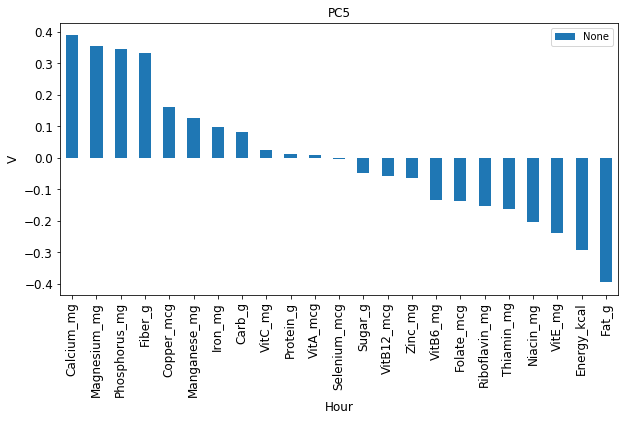

Calcium_mg       0.388692
Magnesium_mg     0.352742
Phosphorus_mg    0.344929
Fiber_g          0.332161
Copper_mcg       0.161241
Manganese_mg     0.125600
Iron_mg          0.097110
Carb_g           0.082723
VitC_mg          0.024713
Protein_g        0.013176
VitA_mcg         0.008137
Selenium_mcg    -0.005049
Sugar_g         -0.048421
VitB12_mcg      -0.058857
Zinc_mg         -0.064319
VitB6_mg        -0.133747
Folate_mcg      -0.137697
Riboflavin_mg   -0.153460
Thiamin_mg      -0.161520
Niacin_mg       -0.203433
VitE_mg         -0.238019
Energy_kcal     -0.293596
Fat_g           -0.394450
dtype: float64
()
()
------------


In [12]:
vects = fit.components_[:5]

one = pd.Series(vects[0], index = data_no_classes.columns)
vec_1 = one.sort_values(ascending=False)
one = pd.Series(vects[1], index = data_no_classes.columns)
vec_2 = one.sort_values(ascending=False)
one = pd.Series(vects[2], index = data_no_classes.columns)
vec_3 = one.sort_values(ascending=False)
one = pd.Series(vects[3], index = data_no_classes.columns)
vec_4 = one.sort_values(ascending=False)
one = pd.Series(vects[4], index = data_no_classes.columns)
vec_5 = one.sort_values(ascending=False)

print("PC1 : high in vitamins and minerals, low in fat and sugar ")
print("May assume high protein, high iron levels, however not the case")
ax = vec_1.plot(kind='bar', title ="PC1", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
print(vec_1)
print()
print()
print('------------')

print("High protein levels and Vitamin B12 are positively corolated")
print("Foods high in protein are usually associate with food that is low in fat, Energy, Carbs, sugar and fibre")
ax = vec_2.plot(kind='bar', title ="PC2", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
print(vec_2)
print()
print()
print('------------')

print("foods with high levels of folate riboflavin, thiamin are low in protein, phosphorous, energy and fat ")
ax = vec_3.plot(kind='bar', title ="PC3", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
print(vec_3)
print()
print()
print('------------')


ax = vec_4.plot(kind='bar', title ="PC4", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
print(vec_4)
print()
print()
print('------------')


ax = vec_5.plot(kind='bar', title ="PC5", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
print(vec_5)
print()
print()
print('------------')

## Create a 2D PCA plot with best two PCs

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

/home/joe/.local/lib/python2.7/site-packages/seaborn/regression.py:576: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[-0.75399916 -0.75180753 -0.5579674  ... -0.40771224  0.35473956
 -0.56634934]


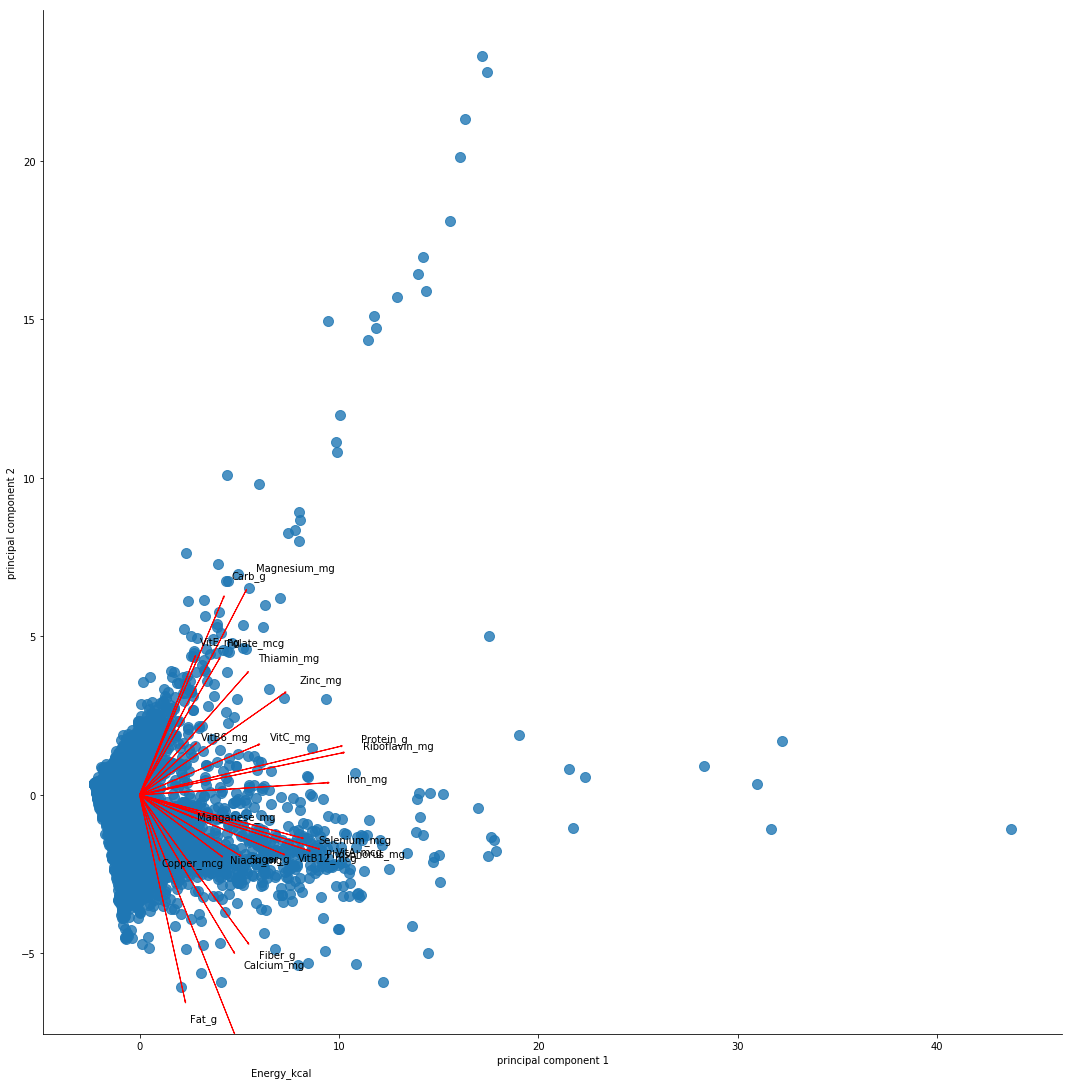

In [14]:
import seaborn as sns
 
 
# Scatter plot based and assigne color based on 'label - y'
sns.lmplot('principal component 1', 'principal component 2', data=principalDf, fit_reg = False, size = 15, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(data_no_classes_STD)[:,0]
ys = pca.transform(data_no_classes_STD)[:,1]
 
    
    
print(xs)
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(data_no_classes_STD.columns.values)[i])
 
# for i in range(len(xs)):
#      plt.text(xs[i]*1.08, ys[i]*1.08, list(X.index)[i], color='b') # index number of each observations
#      plt.title('PCA Plot of first PCs')

In [15]:
finalDf = pd.concat([principalDf, data[['FoodGroup']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,FoodGroup
0,-1.121776,-1.182219,Dairy and Egg Products
1,-1.114687,-1.184141,Dairy and Egg Products
2,-0.994920,-1.573539,Dairy and Egg Products
3,0.235910,0.566084,Dairy and Egg Products
4,0.300785,0.537674,Dairy and Egg Products


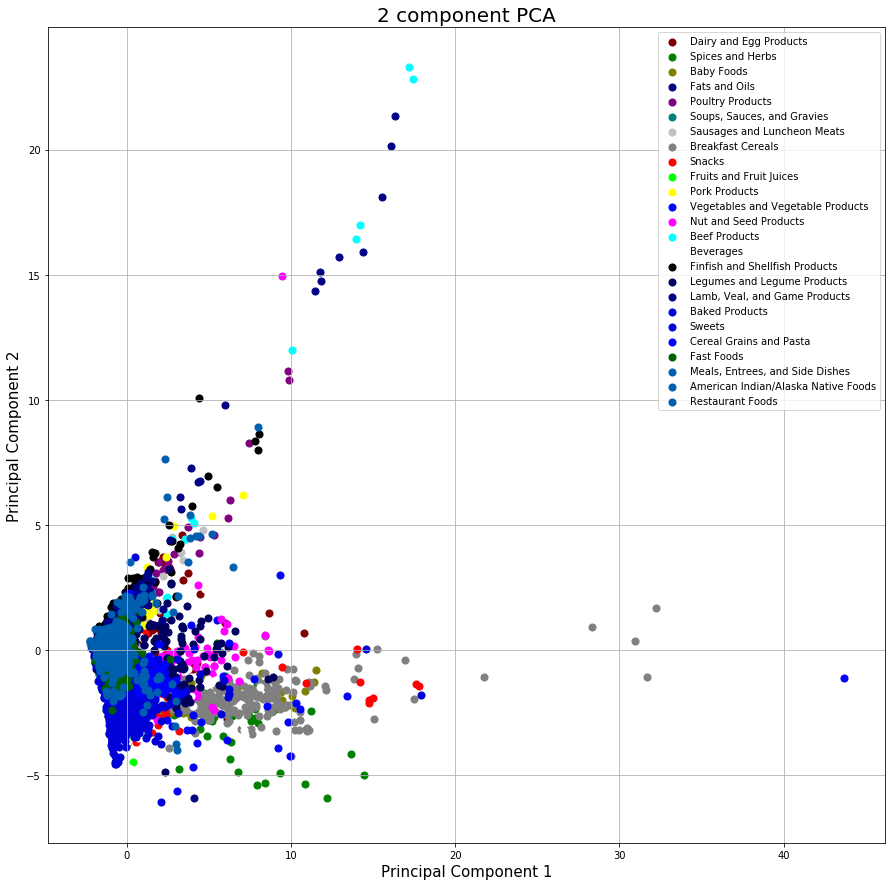

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

class_colors = zip(targets,colors)
for target, color in class_colors:
    indicesToKeep = finalDf['FoodGroup'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

### What does this 2D PCA plot tell us about the data?

Does it explain the data?<br>
<br>
Results:<br>
breakfast cereals are an exception where they cluster at a dfiiferent position where the others cluster at the same position<br>

PC2 does a good job at serpeating out:<br>
pink and yellow<br>
pink and grey <br>
purple and blue<br>

PC1 does a good job at seperating between:<br>
grey and purple<br>
grey and red<br>
grey and fdarl purple<br>
grey and green<br>
grey and yellow<br>
dark purple and blue <br>
dark purple and green<br>

both are not very good at seperating out green and blue<br>


The component 2 does a good job at explaining the variance in<br>
blue<br>
green <br>
purple<br>
This is becuase the clusters are spread or elipical in PC2<br>

The component 3does a VERY good job at explaining the variance in<br>
grey as it spread grey elipically across PC1<br>

-----

can i say that blue green and purple corolate<br>

with some certainty, it is possible to determine withe PC1 and PC2 where a food item may belong. 
It will certainly narrow down the possiblitys aznd make predictions. 

For example one one had a food sample, and they messure these nutrient levels, it may be possible to identfy what food group the food is likely to be. 

For example, if this new sample was to be located near teh centre of teh grey cluster, you could with some certainly conclude that the sampel is cereal. 

The PCA plot does describe the cariation in some of the classes, however teh cluseters are overlapped. 
If class separation it may be better to use LDA.



# Create LDA 2D plot

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
principalComponents_LDA = lda.fit_transform(x_std, classes)
principalDf_LDA = pd.DataFrame(data = principalComponents_LDA
             , columns = ['principal component 1', 'principal component 2'])

print(type(classes))

<class 'pandas.core.series.Series'>


In [18]:
finalDf_LDA = pd.concat([principalDf_LDA, data[['FoodGroup']]], axis = 1)
print(finalDf_LDA.shape)

(8618, 3)


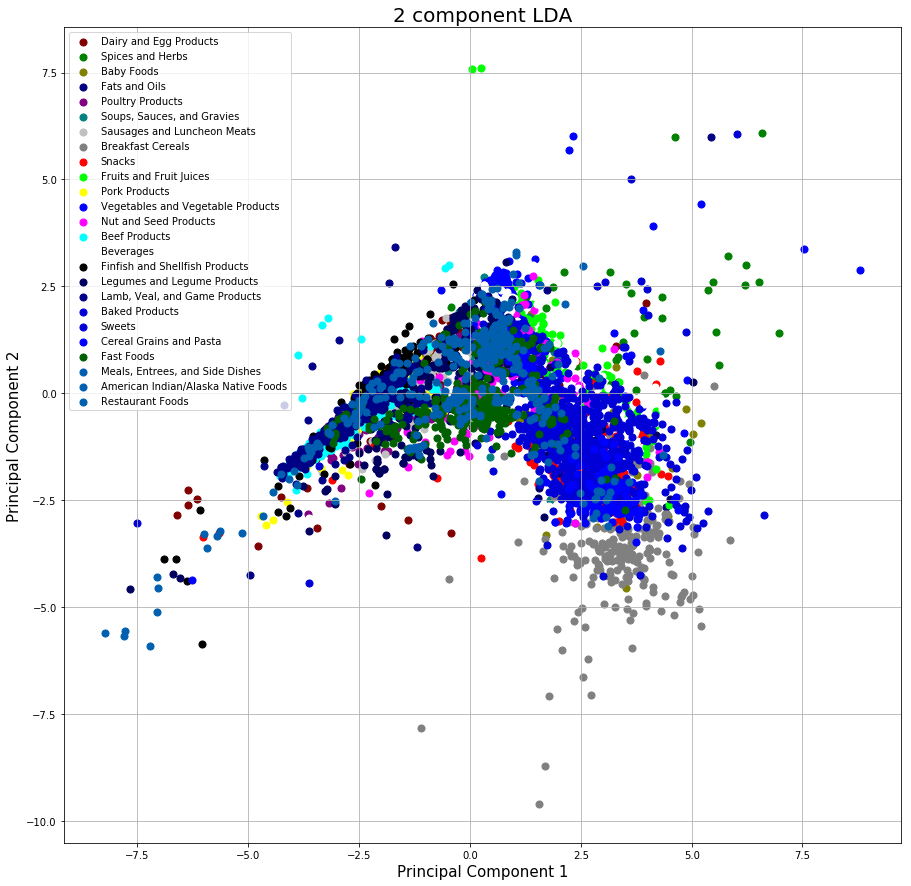

In [19]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)

class_colors = zip(targets,colors)
for target, color in class_colors:
    indicesToKeep = finalDf_LDA['FoodGroup'] == target
    
    ax.scatter(finalDf_LDA.loc[indicesToKeep, 'principal component 1']
               , finalDf_LDA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

In [20]:
#plt.figure(figsize = (10,10))





in  1
in  2


## Create 2D tSNE Plot

('PERPLEXITY VALUE: ', 20, '  LEARNING RATE VALUE: ', 100)
('PERPLEXITY VALUE: ', 20, '  LEARNING RATE VALUE: ', 100)


<Figure size 576x576 with 0 Axes>

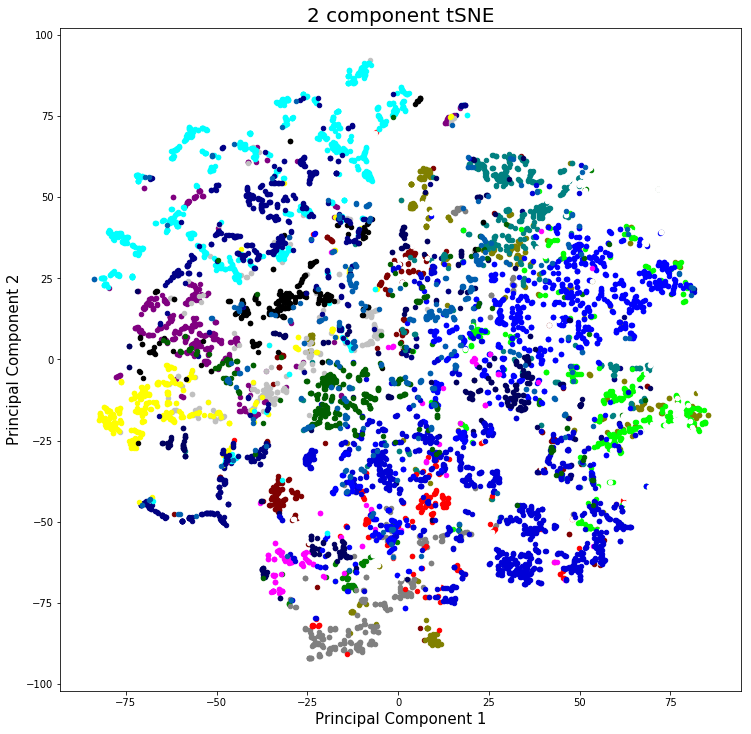

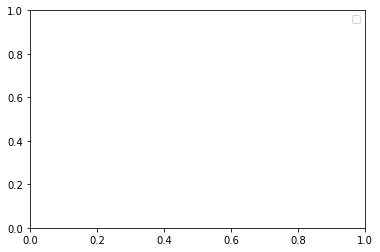

In [21]:



print("PERPLEXITY VALUE: ",perlexity_batch[0],"  LEARNING RATE VALUE: ",learning_rate_par[0] )
digits_final = TSNE(perplexity=perlexity_batch[0], learning_rate=learning_rate_par[0]).fit_transform(data_no_classes_STD) 
TSNE_raw = pd.DataFrame({'TSNE_C1': digits_final[:, 0],'TSNE_C2': digits_final[:, 1]})
digits_final = pd.concat([TSNE_raw, data[['FoodGroup']]], axis = 1)



count = 1
fig = plt.figure(figsize = (8,8))


# plt.subplots(nrows=1, ncols=2)
# fig = plt.figure(figsize = (4,4))
count = 1




for P in range(len(perlexity_batch)):
    for LR in range(len(learning_rate_par)):
        
        print("PERPLEXITY VALUE: ",perlexity_batch[P],"  LEARNING RATE VALUE: ",learning_rate_par[LR] )
        digits_final = TSNE(perplexity=perlexity_batch[P], learning_rate=learning_rate_par[LR]).fit_transform(data_no_classes_STD) 
        TSNE_raw = pd.DataFrame({'TSNE_C1': digits_final[:, 0],'TSNE_C2': digits_final[:, 1]})
        digits_final = pd.concat([TSNE_raw, data[['FoodGroup']]], axis = 1)
      
        plt.figure(figsize = (100,100))
        plt.subplot(7, 7,count)
        plt.xlabel('Principal Component 1', fontsize = 15)
        plt.ylabel('Principal Component 2', fontsize = 15)
        plt.title('2 component tSNE', fontsize = 20)
        
#         ax = fig.add_subplot(1,2,count) 
#         ax.set_xlabel('Principal Component 1', fontsize = 15)
#         ax.set_ylabel('Principal Component 2', fontsize = 15)
#         ax.set_title('2 component tSNE', fontsize = 20)


        for target, color in class_colors:
            indicesToKeep = digits_final['FoodGroup'] == target

            plt.scatter(digits_final.loc[indicesToKeep, 'TSNE_C1']
                       , digits_final.loc[indicesToKeep, 'TSNE_C2']
                       , c = color
                       , s = 20)
        count = count+1
        plt.show()
plt.legend(targets)
plt.show()
        #plt.grid()
        
        

In [22]:
# print("dfs")
# count = 1
# for P in range(len(perlexity_batch)):
#     for LR in range(len(learning_rate_par)):
#         plt.subplots(figsize = (100,100))
#         #plt.figure(figsize = (15,15))
#         plt.subplot(7, 7,count)
#         plt.xlabel('Principal Component 1', fontsize = 15)
#         plt.ylabel('Principal Component 2', fontsize = 15)
#         plt.title('2 component tSNE', fontsize = 20)

#         for target, color in class_colors:
#             indicesToKeep = digits_final['FoodGroup'] == target

#             plt.scatter(digits_final.loc[indicesToKeep, 'TSNE_C1']
#                        , digits_final.loc[indicesToKeep, 'TSNE_C2']
#                        , c = color
#                        , s = 20)
#         count = count+1
#         plt.legend(targets)
#         plt.show()
        
# plt.show()

In [23]:
print("fin ")

fin 


In [24]:
# print(digits_final.shape)
# print(digits_final)

In [25]:


# TSNE_raw = pd.DataFrame(
#     {'Energy_kcal': digits_final[:, 0],'Protein_g': digits_final[:, 1],'Fat_g': digits_final[:, 2],
#     'Carb_g': digits_final[:, 3],'Sugar_g': digits_final[:, 4],'Fiber_g': digits_final[:, 5],
#     'VitA_mcg': digits_final[:, 6],'VitB6_mg': digits_final[:, 7],'VitB12_mcg': digits_final[:, 8],
#     'VitC_mg': digits_final[:, 9],'VitE_mg': digits_final[:, 10],'Folate_mcg': digits_final[:, 11],
#     'Niacin_mg': digits_final[:, 12],'Riboflavin_mg': digits_final[:, 13],'Thiamin_mg': digits_final[:, 14],
#     'Calcium_mg': digits_final[:, 15],'Copper_mcg': digits_final[:, 16],'Iron_mg': digits_final[:, 17],
#     'Magnesium_mg': digits_final[:, 18],'Manganese_mg': digits_final[:, 19],'Phosphorus_mg': digits_final[:, 20],
#     'Selenium_mcg': digits_final[:, 21],'Zinc_mg': digits_final[:, 22]})

In [26]:

# trail one Tsne 30, no learning rate

In [27]:

# fig = plt.figure(figsize = (15,15))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component tSNE', fontsize = 20)

# print("1")
# for target, color in class_colors:
#     indicesToKeep = digits_final['FoodGroup'] == target
    
#     ax.scatter(digits_final.loc[indicesToKeep, 'TSNE_C1']
#                , digits_final.loc[indicesToKeep, 'TSNE_C2']
#                , c = color
#                , s = 50)

# print("2.1")
# ax.legend(targets)
# ax.grid()
# print("3")

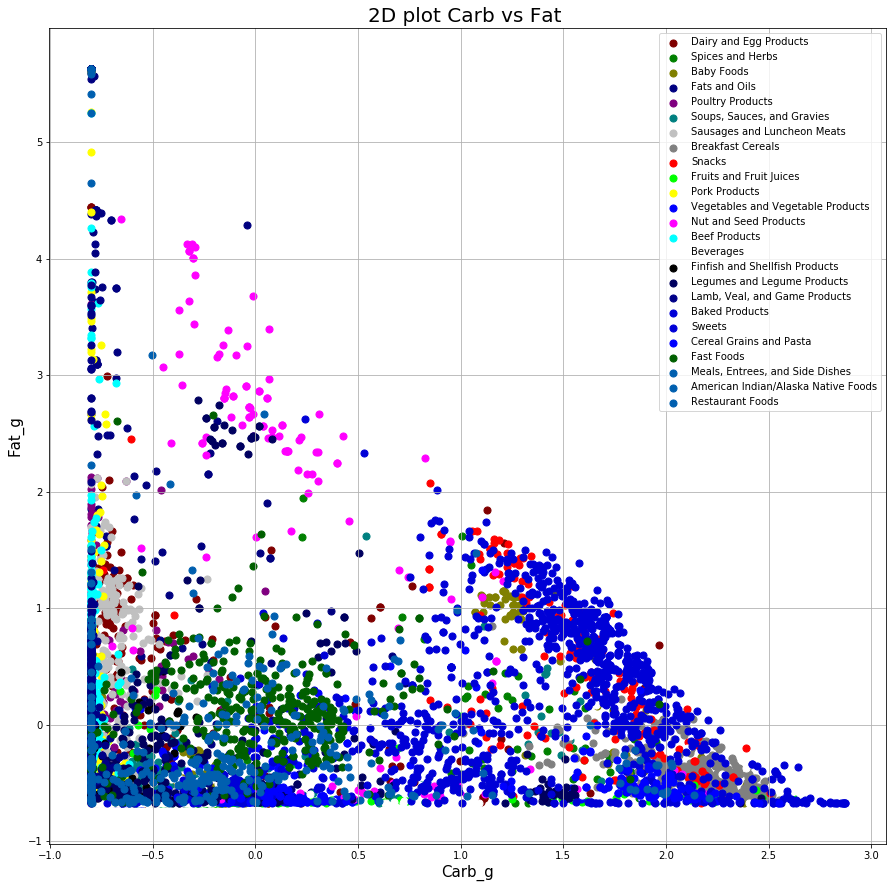

In [28]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Carb_g', fontsize = 15)
ax.set_ylabel('Fat_g', fontsize = 15)
ax.set_title('2D plot Carb vs Fat ', fontsize = 20)

x = data_no_classes_STD['Carb_g']
y = data_no_classes_STD['Fat_g']

#dfxy = pd.DataFrame(x, y, finalDf_LDA['FoodGroup'])

dfxy = pd.concat([x, y, data[['FoodGroup']]], axis = 1)
dfxy.head()

#print(dfxy)

class_colors = zip(targets,colors)
for target, color in class_colors:
    indicesToKeep = dfxy['FoodGroup'] == target
    
    ax.scatter(dfxy.loc[indicesToKeep, 'Carb_g']
               , dfxy.loc[indicesToKeep, 'Fat_g']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()



### What does this 2D LDA plot tell us about the data?

Does it successfully seprate the classes?
Will clusters centroids help explain data?


# 2D projections of data on original dimensions

##select those that explain the PCA plts 1-5 in charts for PCA


Text(0.5,1,'Niacin_mg vs Riboflavin_mg')

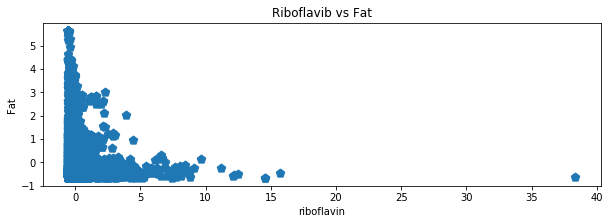

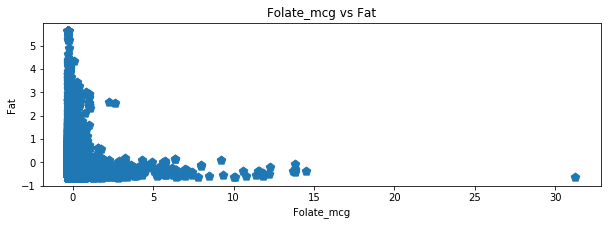

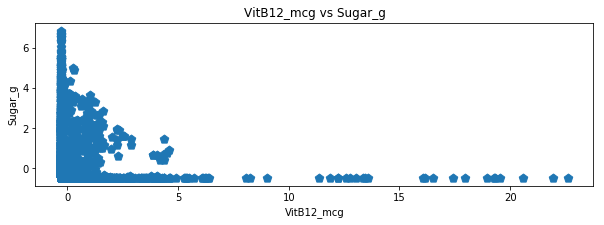

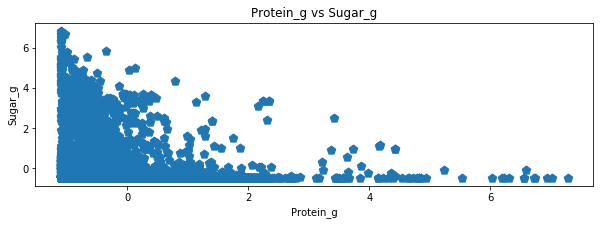

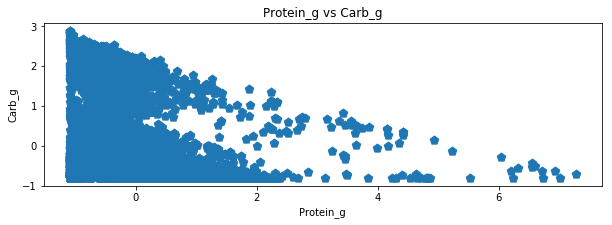

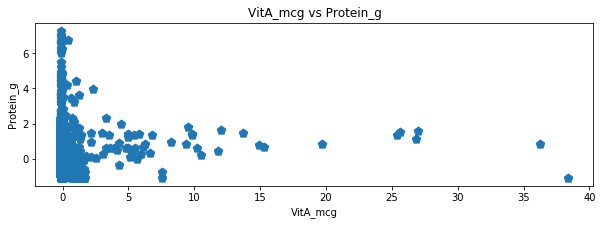

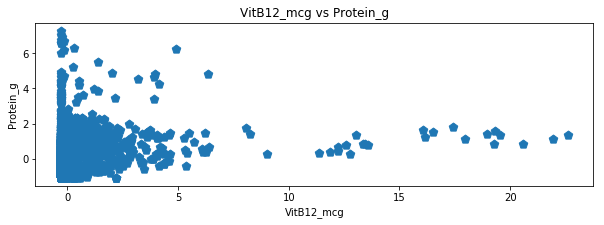

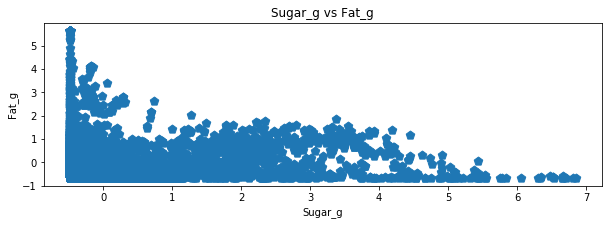

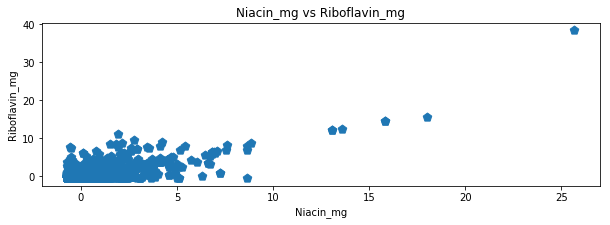

In [29]:
x = data_no_classes_STD['Riboflavin_mg']
y = data_no_classes_STD['Fat_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("riboflavin")
plt.ylabel("Fat")
plt.title("Riboflavib vs Fat")

x = data_no_classes_STD['Folate_mcg']
y = data_no_classes_STD['Fat_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("Folate_mcg")
plt.ylabel("Fat")
plt.title("Folate_mcg vs Fat")

x = data_no_classes_STD['VitB12_mcg']
y = data_no_classes_STD['Sugar_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("VitB12_mcg")
plt.ylabel("Sugar_g")
plt.title("VitB12_mcg vs Sugar_g")

x = data_no_classes_STD['Protein_g']
y = data_no_classes_STD['Sugar_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("Protein_g")
plt.ylabel("Sugar_g")
plt.title("Protein_g vs Sugar_g")


x = data_no_classes_STD['Protein_g']
y = data_no_classes_STD['Carb_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("Protein_g")
plt.ylabel("Carb_g")
plt.title("Protein_g vs Carb_g")

x = data_no_classes_STD['VitA_mcg']
y = data_no_classes_STD['Protein_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("VitA_mcg")
plt.ylabel("Protein_g")
plt.title("VitA_mcg vs Protein_g")

x = data_no_classes_STD['VitB12_mcg']
y = data_no_classes_STD['Protein_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("VitB12_mcg")
plt.ylabel("Protein_g")
plt.title("VitB12_mcg vs Protein_g")


x = data_no_classes_STD['Sugar_g']
y = data_no_classes_STD['Fat_g']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("Sugar_g")
plt.ylabel("Fat_g")
plt.title("Sugar_g vs Fat_g")

x = data_no_classes_STD['Niacin_mg']
y = data_no_classes_STD['Riboflavin_mg']
plt.figure(figsize=(10,3))
plt.scatter(x, y, s=80, marker=(5, 0))
plt.xlabel("Niacin_mg")
plt.ylabel("Riboflavin_mg")
plt.title("Niacin_mg vs Riboflavin_mg")



## Energy kcal - can it be predicted from the other variables?


### Energy kcal Histogram

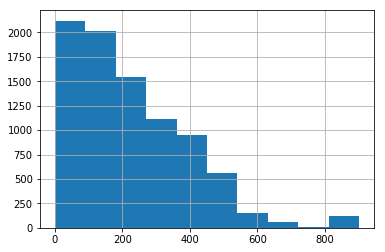

In [30]:
data_no_classes['Energy_kcal'].hist()

### Separate the energy values into low medium and high
0-200 kcal = low<br>
200-400 kcal = mid<br>
400-600 kcal = high<br>
600+ kcal = very_high<br>

In [31]:
energy_class = []
print("LENHGTH before ", len(data_no_classes['Energy_kcal']))


count = 0
for i in range (len(data_no_classes['Energy_kcal'])):

    value = data_no_classes['Energy_kcal'][i] 
    
    if (value <= 200):
        print(i,value, "  low  ", count )
        energy_class.append('low') 
        
        count = count+1
            
    if (201 <= value <= 400):
        print(i,value, "  med  ", count)
        energy_class.append('med') 

        count = count+1
        
    if (401 <= value <= 600):
        print(i,value, "  high  ", count )
        energy_class.append('high') 
  
        count = count+1
        
    if (601 <= value):
        print(i,value, "  VHIGH  ", count)
        energy_class.append('v_high')

        count = count+1
    
# print(data_no_classes['Energy_kcal'][206])
    
    
        
energy_class1 = pd.DataFrame({'Energy_class' : energy_class[:]})

print("lenght after ", len(energy_class1))

('LENHGTH before ', 8618)
(0, 717.0, '  VHIGH  ', 0)
(1, 717.0, '  VHIGH  ', 1)
(2, 876.0, '  VHIGH  ', 2)
(3, 353.0, '  med  ', 3)
(4, 371.0, '  med  ', 4)
(5, 334.0, '  med  ', 5)
(6, 300.0, '  med  ', 6)
(7, 376.0, '  med  ', 7)
(8, 406.0, '  high  ', 8)
(9, 387.0, '  med  ', 9)
(10, 394.0, '  med  ', 10)
(11, 98.0, '  low  ', 11)
(12, 97.0, '  low  ', 12)
(13, 72.0, '  low  ', 13)
(14, 81.0, '  low  ', 14)
(15, 72.0, '  low  ', 15)
(16, 342.0, '  med  ', 16)
(17, 357.0, '  med  ', 17)
(18, 264.0, '  med  ', 18)
(19, 389.0, '  med  ', 19)
(20, 466.0, '  high  ', 20)
(21, 356.0, '  med  ', 21)
(22, 413.0, '  high  ', 22)
(23, 327.0, '  med  ', 23)
(24, 373.0, '  med  ', 24)
(25, 300.0, '  med  ', 25)
(26, 318.0, '  med  ', 26)
(27, 254.0, '  med  ', 27)
(28, 301.0, '  med  ', 28)
(29, 368.0, '  med  ', 29)
(30, 253.0, '  med  ', 30)
(31, 420.0, '  high  ', 31)
(32, 392.0, '  med  ', 32)
(33, 352.0, '  med  ', 33)
(34, 351.0, '  med  ', 34)
(35, 174.0, '  low  ', 35)
(36, 138.0, '  lo

### Seperate Energy attribute from rest of data set

In [32]:
#just energy
Y = data_no_classes_STD['Energy_kcal']

# everything else except energy : removes energy column
X = data_no_classes_STD
del X['Energy_kcal']



### Create colors and targets index

In [33]:
#colors 
Blue='#0000ff'
DarkGreen='#005f00'
Yellow='#ffff00'
Red='#ff0000'
colors =[Blue,DarkGreen, Yellow, Red]

#targets
targets = ['low','med','high', 'v_high']

## PCA Energy_kcal

### Run 2 component PCA

In [34]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Plot PCA with Energy class

In [35]:
print(energy_class1[['Energy_class']].shape)
print(X.shape)

(8618, 1)
(8618, 22)


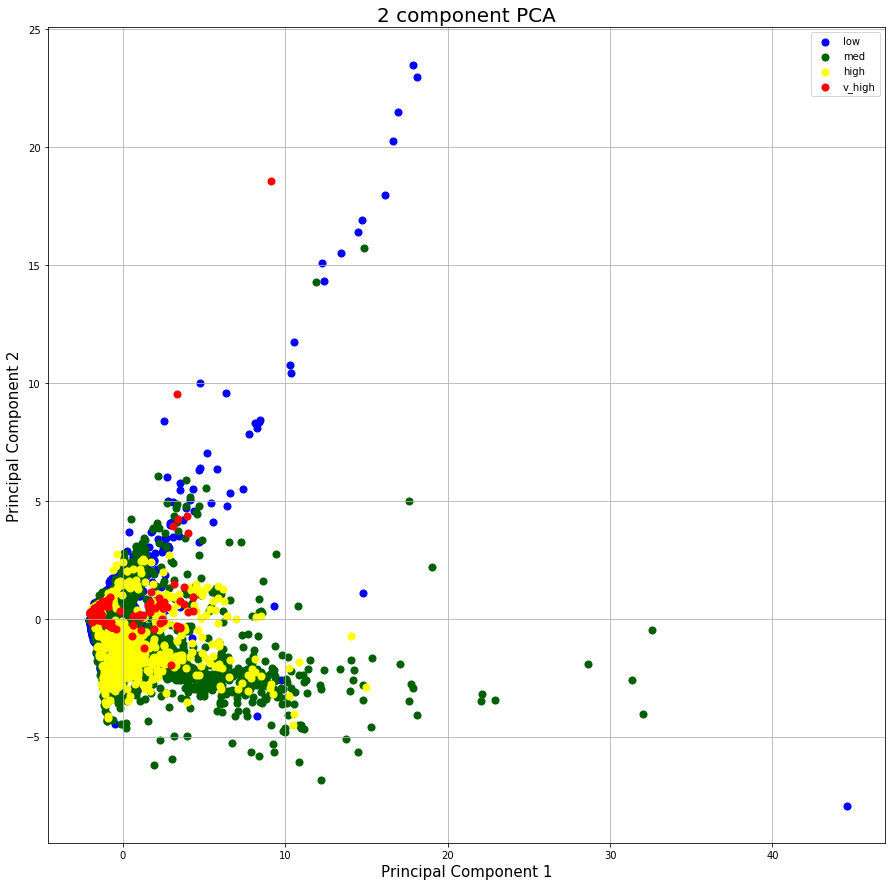

In [36]:
finalDf = pd.concat([principalDf, energy_class1[['Energy_class']]], axis = 1)
finalDf.head()

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
class_colors = zip(targets,colors)
for target, color in class_colors:
    indicesToKeep = finalDf['Energy_class'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

Results: <br>

What does this graph reveal?
Is it a good graph?




In [37]:
print(classes.shape)
print(X.shape)

(8618,)
(8618, 22)


## LDA kcal  

In [38]:
classes = energy_class1.loc[:, 'Energy_class']

lda = LinearDiscriminantAnalysis(n_components=2)
principalComponents_LDA = lda.fit_transform(X, classes)

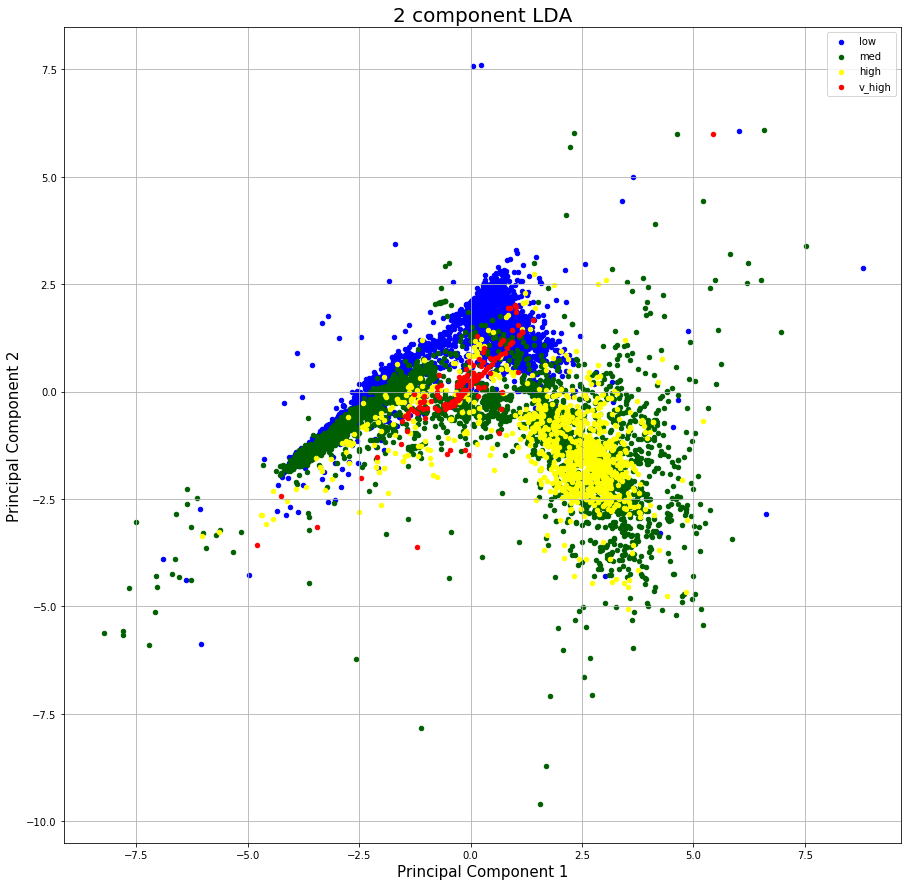

In [39]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)

class_colors = zip(targets,colors)
for target, color in class_colors:
    #indicesToKeep = finalDf_LDA['Energy_class'] == target
    indicesToKeep = classes == target
    
    ax.scatter(finalDf_LDA.loc[indicesToKeep, 'principal component 1']
               , finalDf_LDA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)

ax.legend(targets)
ax.grid()

In [ ]:
# print("in  1")
# from sklearn.manifold import TSNE
# print("in  2")

# # perlexity_batch = [20, 30, 40, 50, 70, 90, 20]
# # learning_rate_par = [100, 150, 200, 250, 300, 350, 400]

# #print("PERPLEXITY VALUE: ",perlexity_batch[P],"  LEARNING RATE VALUE: ",learning_rate_par[LR] )
digits_final = TSNE(perplexity=20, learning_rate=100).fit_transform(data_no_classes_STD) 
TSNE_raw = pd.DataFrame({'TSNE_C1': digits_final[:, 0],'TSNE_C2': digits_final[:, 1]})
digits_final = pd.concat([TSNE_raw, energy_class1[['Energy_class']]], axis = 1)



# plt.figure(figsize = (100,100))
# plt.subplot(7, 7,count)
# plt.xlabel('Principal Component 1', fontsize = 15)
# plt.ylabel('Principal Component 2', fontsize = 15)
# plt.title('2 component tSNE', fontsize = 20)

# #         ax = fig.add_subplot(1,2,count) 
# #         ax.set_xlabel('Principal Component 1', fontsize = 15)
# #         ax.set_ylabel('Principal Component 2', fontsize = 15)
# #         ax.set_title('2 component tSNE', fontsize = 20)


for target, color in class_colors:
    indicesToKeep = digits_final['Energy_class'] == target

    plt.scatter(digits_final.loc[indicesToKeep, 'TSNE_C1']
               , digits_final.loc[indicesToKeep, 'TSNE_C2']
               , c = color
               , s = 20)
count = count+1

plt.legend(targets)
plt.show()
# #plt.grid()

In [ ]:
## Labelling on Animal and Plant products, are there any differences? PCA, LDA

In [ ]:
## Can we classify between takeway, resurant, baby food, American Indian/Alaska Native Foods

#PCA/LDA

In [ ]:
## Take One Out, Can we predict energy of food, by other atributes succesfully?

In [ ]:
# END

What is the data set?

where does data set come from?
- Data set comes from https://data.world/craigkelly/usda-national-nutrient-db which come from 
https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/methods-and-application-of-food-composition-laboratory/mafcl-site-pages/sr17-sr28/

What are the numerical features of the data?
- Data set has 38 dimensions

What questions do i want to answer?
